# Air Forcasting

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from pandas.plotting import lag_plot
import statsmodels.graphics.tsaplots as plot_acf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from numpy import sqrt
from numpy import log
import datetime
from sklearn.metrics import mean_squared_error
from pandas.tseries.offsets import DateOffset
from datetime import datetime,time
import statsmodels.formula.api as smf
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import statsmodels.graphics.tsaplots as tsa_plots
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller

In [2]:
air_quality = pd.read_excel('CO2_dataset.xlsx')
air_quality

,Year,CO2
0,1800,0.00568
1,1801,0.00561
2,1802,0.00555
3,1803,0.00548
4,1804,0.00542
...,...,...
210,2010,15.60000
211,2011,15.60000
212,2012,14.80000
213,2013,14.70000


* The dataset has one variable dependent w.r.t time hence we call the dataset as "Univariant Dataset"

# 1) EDA

In [3]:
# cheaking for null values, datatype of variable

air_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    215 non-null    int64  
 1   CO2     215 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 3.5 KB


In [4]:
# Count of duplicate row

air_quality[air_quality.duplicated()].shape

(0, 2)

* No Duplicate row is found in dataset.

In [5]:
# data Structure

air_quality.shape

(215, 2)

* Here we have 215 rows and 2 column in our dataset

In [6]:
# Data type

air_quality.dtypes

Year      int64
CO2     float64
dtype: object

In [7]:
# Prasing year column as date (for time series analysis time should be always in date_time dtype)
# using this as index column for further analysis

air_quality1 = pd.read_excel("CO2_dataset.xlsx",parse_dates=['Year'],index_col='Year')# parse_dates=['Year']= Pandas to interpret the values in the 'Year' column as datetime objects.
air_quality1

,CO2
Year,
1800-01-01,0.00568
1801-01-01,0.00561
1802-01-01,0.00555
1803-01-01,0.00548
1804-01-01,0.00542
...,...
2010-01-01,15.60000
2011-01-01,15.60000
2012-01-01,14.80000


In [8]:
df=air_quality

In [9]:
df['Year']=pd.to_datetime(df['Year'],format='%Y')
df = df.set_index('Year')

In [10]:
# We can do convinient slicing for specific time period

air_quality1['1840-01-01': '1860-01-01']

,CO2
Year,
1840-01-01,0.00210
1841-01-01,0.00202
1842-01-01,0.00195
1843-01-01,0.00188
1844-01-01,0.00181
1845-01-01,0.00175
1846-01-01,0.01180
1847-01-01,0.01470
1848-01-01,0.01740


In [11]:
# Discriptive stat

air_quality1.describe().T

,count,mean,std,min,25%,50%,75%,max
CO2,215.0,6.74197,6.522437,0.00175,0.04105,6.39,11.5,18.2


# 1.1 Outlier Detection

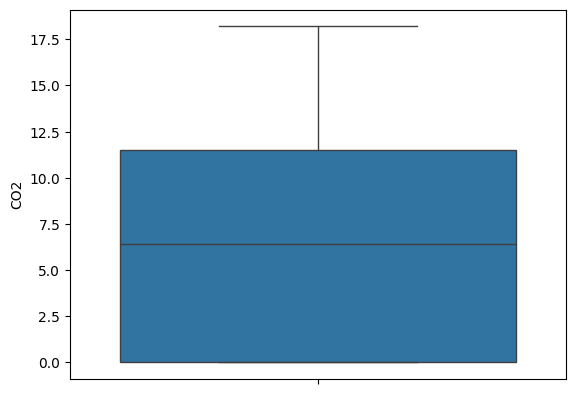

In [12]:
sns.boxplot(data=air_quality1,y='CO2')
plt.show()

* From the above box plot we can say that there is no outlier present in CO2 Column of dataset

# 1.2 Visulization

In [13]:
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [14]:
air = pd.read_excel('CO2_dataset.xlsx')
air

,Year,CO2
0,1800,0.00568
1,1801,0.00561
2,1802,0.00555
3,1803,0.00548
4,1804,0.00542
...,...,...
210,2010,15.60000
211,2011,15.60000
212,2012,14.80000
213,2013,14.70000


In [15]:
# plot a line plot using plotly

fig = px.line(air, x=air.Year,y=[air['CO2']],
             labels={'Year':'Year','Value':'CO2 Emmision'})
fig.update_layout(title_text = 'CO2 Emmision Chart',font_size = 15, font_color = 'black',legend_title_text = 'CO2 Parameters')
fig.update_xaxes(showgrid=True)
fig.update_yaxes(showgrid=True)
fig.show()

# Inference

* Here we can see sundden increse in CO2 emmision between 1840 - 1860 and 1960 - 1985

* So For detail view lets split the data and have a close look at these time periods

In [16]:
# Spitiing data

df1 = air_quality1['1840':'1860']
df2 = air_quality1['1960':'1985']

Text(0, 0.5, 'CO2 Emmision')

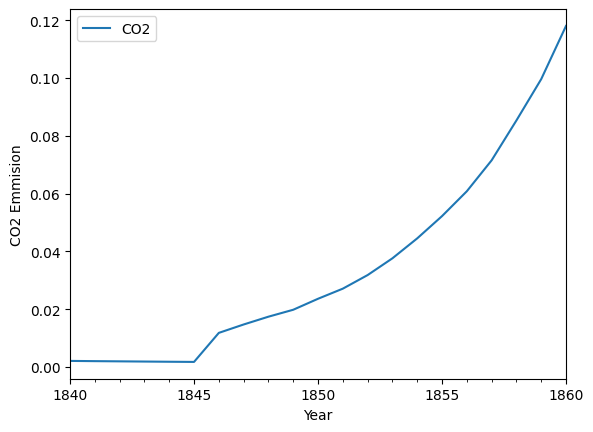

In [17]:
# Checking for time period of 1880-1900

ax1 = df1.plot()
ax1.set_ylabel('CO2 Emmision')

* Inference:-
    
    * As here we see there is a sudden rise in CO2 emmision After 1845.
    
    * from Google serch we come to know that this is because of the starting of industrialization which led by United Kingdom
      at that time period
    
    * with USA as second highest Emmiter in the world And @ first there is china Country.

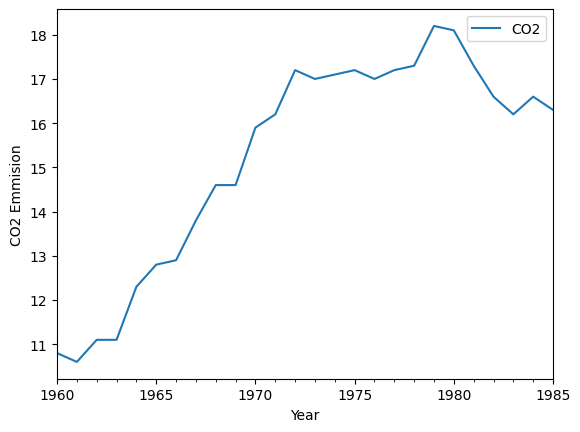

In [18]:
# Checking For time period of 1960 - 1985

ax2 = df2.plot()
ax2.set_ylabel('CO2 Emmision');

* Inference:-
    
    * Here we can see immence growth in CO2 after 1960.
    
    * As the reson we found that there where new development after 1960.

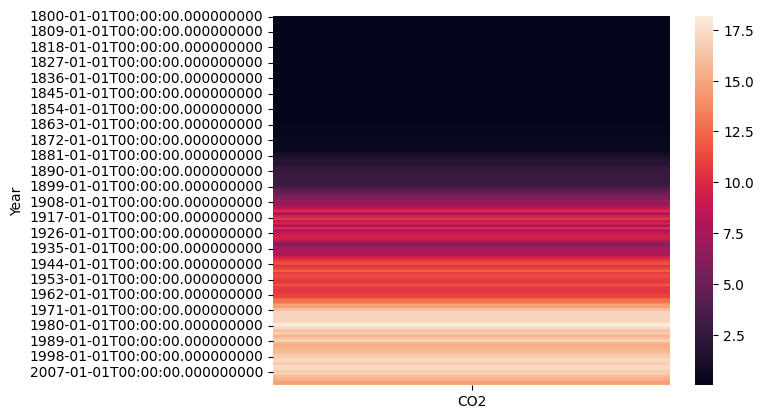

In [19]:
ax = sns.heatmap(air_quality1)

Inference:-
    
* From Above heatmap we also see that there is maximum CO2 emmision is after 1989

# 1.3 Smoothing Methods

* Smoothing methods, such as exponential smoothing, are used for various purposes time series forecasting:-
                                   1) Noise Reduction
                                   2) Seasonal Adjestment
                                   3) Forcasting
                                   4) Trend Estimation
                                   
                                   
* Type Of Smoothing:- 1) Simple Exponential
                      2) Holt's
                      3) Holt's Exponential
                      4) Holt's Multiplicative Damped
                      5) Holt's Additive Damped

# 1.3.1 Simple Exponential Smoothing

In [20]:
from statsmodels.tsa.api import SimpleExpSmoothing, ExponentialSmoothing, Holt

In [21]:
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", message="No frequency information was provided")
    warnings.filterwarnings("ignore", message="Optimization failed to converge")


    fit1 = SimpleExpSmoothing(air_quality1).fit(smoothing_level=0.2,optimized=False)

    fit2 = SimpleExpSmoothing(air_quality1).fit(smoothing_level=0.1,optimized=False)

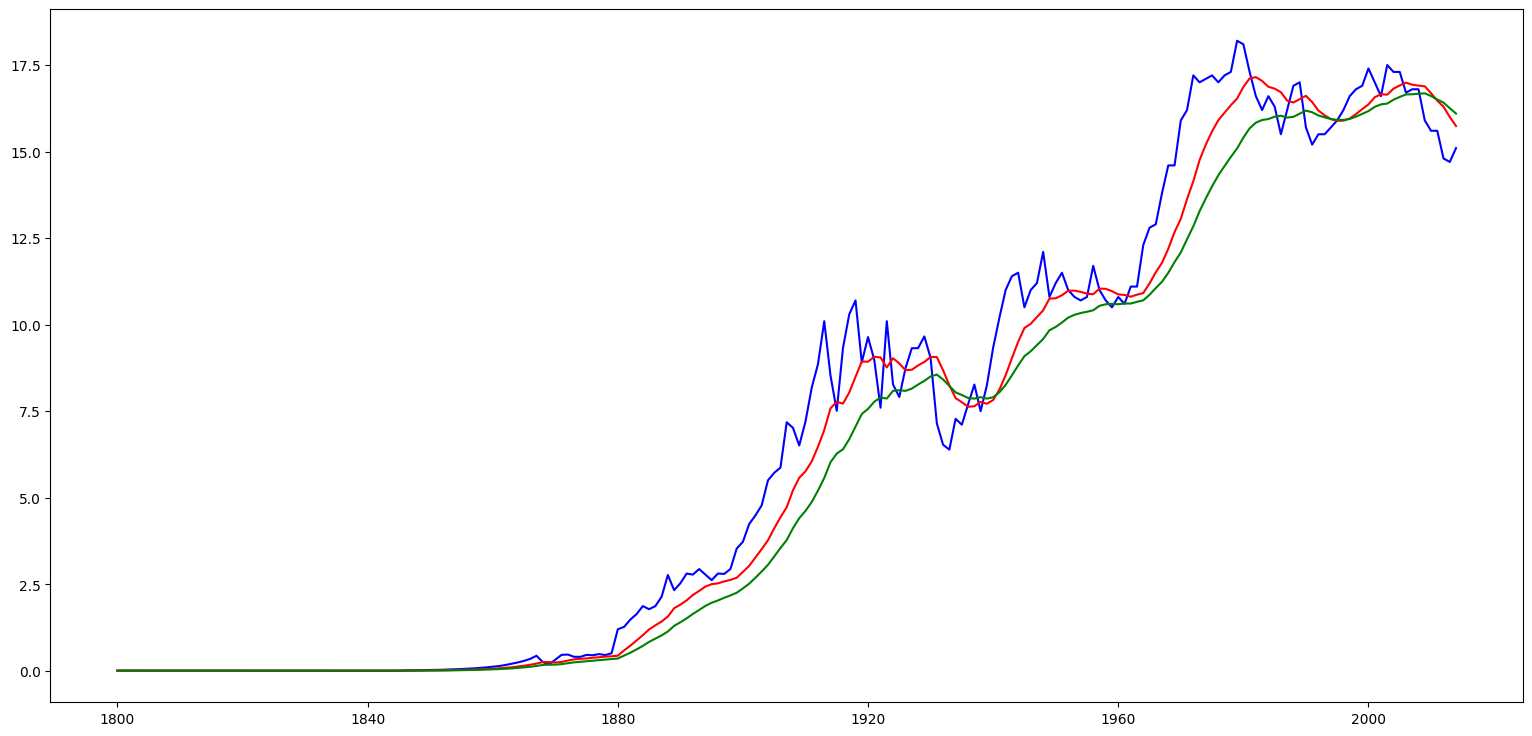

In [22]:
# Visualization

plt .figure(figsize=(19,9))

plt.plot(air_quality1,color='blue')

plt.plot(fit1.fittedvalues,color = 'red')

plt.plot(fit2.fittedvalues,color = 'green')

# 1.3.2 Holt's Method of Exponential Smoothing

In [23]:
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", message="No frequency information was provided")
    warnings.filterwarnings("ignore", message="Optimization failed to converge")


    fit1 = Holt(air_quality1).fit()    #Assuming linear trend

    fit2 = Holt(air_quality1, exponential=True).fit()    #Assuming exponential trend

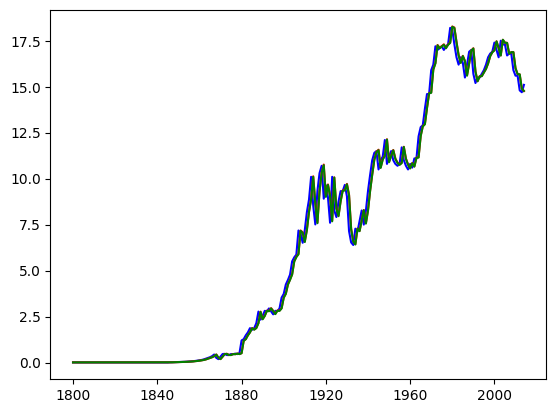

In [24]:
# Visualization

plt.plot(air_quality1, color = 'blue')

plt.plot(fit1.fittedvalues, color = 'red')

plt.plot(fit2.fittedvalues, color = 'green')

# 1.4.3 Comparison of Simple Exponential and Holt's Methods of Forecasting

In [25]:
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", message="No frequency information was provided")
    warnings.filterwarnings("ignore", message="Optimization failed to converge")

    fit1 = SimpleExpSmoothing(air_quality1['CO2'], initialization_method="estimated").fit()
    fcast1 = fit1.forecast(30).rename("Simple Exponential")

    fit2 = Holt(air_quality1['CO2'], initialization_method="estimated").fit()
    fcast2 = fit2.forecast(30).rename("Holt's")

    fit3 = Holt(air_quality1['CO2'], exponential=True, initialization_method="estimated").fit()
    fcast3 = fit3.forecast(30).rename("Holt's Exponential")

    fit4 = Holt(air_quality1['CO2'], damped_trend=True, initialization_method="estimated").fit(damping_trend=0.98)
    fcast4 = fit4.forecast(30).rename("Additive Damped")

    fit5 = Holt(air_quality1['CO2'], exponential=True, damped_trend=True, initialization_method="estimated").fit()
    fcast5 = fit5.forecast(30).rename("Multiplicative Damped")


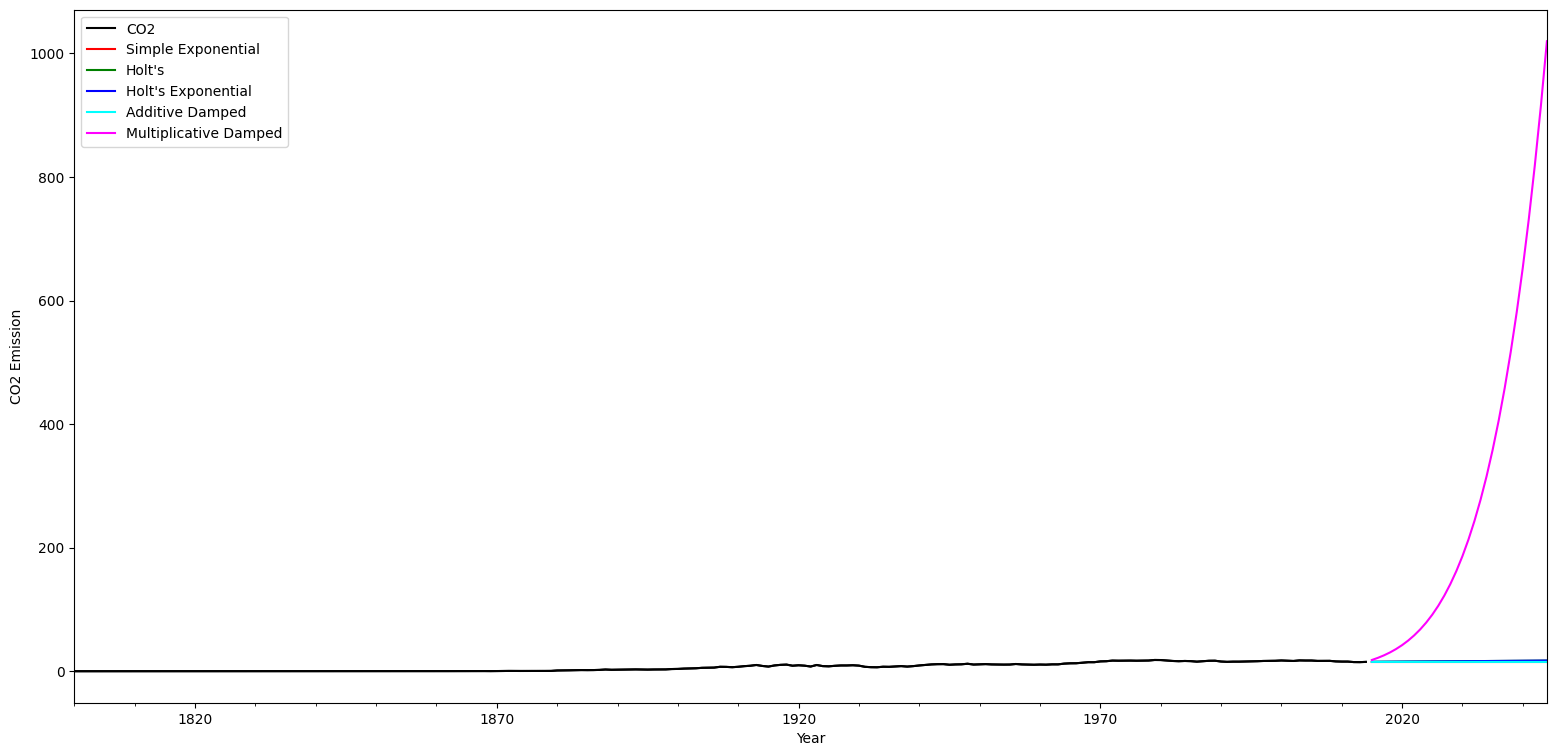

In [26]:
# Visulization

ax = air_quality1.plot(color = 'black',figsize = (19,9))
air_quality1.plot(ax=ax, color="black", legend=False)
fcast1.plot(ax=ax, color="red", legend=True)
fcast2.plot(ax=ax, color="green", legend=True)
fcast3.plot(ax=ax, color="blue", legend=True)
fcast4.plot(ax=ax, color="cyan", legend=True)
fcast5.plot(ax=ax, color="magenta", legend=True)
ax.set_ylabel("CO2 Emission")
plt.show()

In [27]:
a = fcast1.mean()
b = fcast2.mean()
c = fcast3.mean()
d = fcast4.mean()
e = fcast5.mean()

In [28]:
print(a,b,c,d,e)

15.090509114249596 16.17801055316018 16.183065376121984 15.055997753489237 291.48499536480216


In [29]:
data = {"Smoothing Methods":pd.Series(["Simple Exponential","Holt's","Holt's Exponential","Holt's Additive Damped","Holt's Multiplicative Damped"]),"Average Emission":pd.Series([a,b,c,d,e])}
table_smooth=pd.DataFrame(data)
table_smooth

,Smoothing Methods,Average Emission
0,Simple Exponential,15.090509
1,Holt's,16.178011
2,Holt's Exponential,16.183065
3,Holt's Additive Damped,15.055998
4,Holt's Multiplicative Damped,291.484995


# 1.5 Seasnoal Decomposition And ADF Test

* Seasonal decomposition is a technique used in time series analysis to decompose a time series into its individual components: trend, seasonality, and residual (or error) components.

* This decomposition helps in understanding the underlying patterns and structures present in the time series data.

In [30]:
#import seasonal decomposition package library from statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

In [31]:
test_result = adfuller(air_quality['CO2'])

# Check for stationarity of data using dicky fuller test

1)  Ho : It is non-stationary (Null hypothesis)

2) H1 : It is stationary  (Alternative hypothesis)


In [32]:

def adfuller_test(emission):
    result = adfuller(emission)
    labels =  ['ADF test statistic', 'p value', '#Lags used','No. of observations used']
    for value, label in zip(result,labels):
        print(label+':'+str(value))
    if result[1] <= 0.05 :
        print('Strong evidence against null hypothesis, data is stationary')
    else:
        print('Weak evidence against null hypothesis, data is non-stationary')


In [33]:
adfuller_test(air_quality1.CO2)

ADF test statistic:-0.37846277515588717
p value:0.9136330950336237
#Lags used:0
No. of observations used:214
Weak evidence against null hypothesis, data is non-stationary


* Inference:-
So here we can see the data is non-stationary, we have to make it stationary

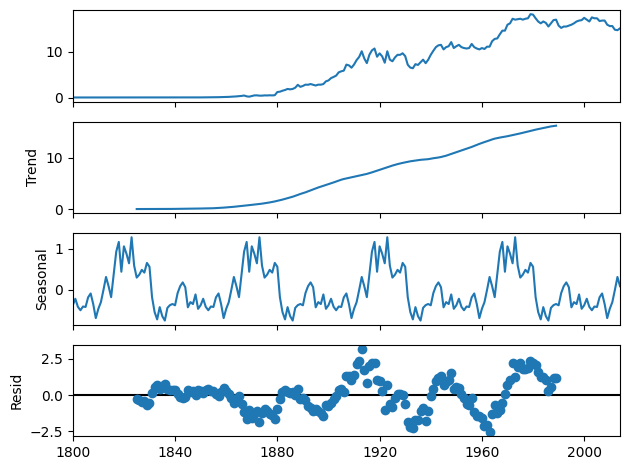

In [34]:
df_mul_decompose = seasonal_decompose(air_quality1, period=50 )# period = length of the seasonal cycle in the data
df_mul_decompose.plot()
plt.show()


# Transforming data to Stationary

Transforming data to stationary using three following methods:

* Moving Average
* Differencing
* Decomposing

# Simple Moving Average
From the Original graph with original value in that we see many Fluctuation So For smooth out Fluctuation and noise in time series data set making it easier to identify underlying trends and pattern.

In [35]:
rollingseries = air_quality1.rolling(window=10)# window operation on 10 data point

rolling_mean = rollingseries.mean()

Graph With Moving Averages


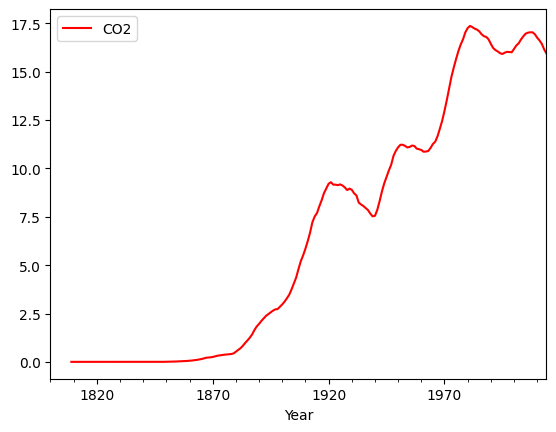

In [36]:
# Plot transform data

print("Graph With Moving Averages")
rolling_mean.plot(color = 'red')
plt.show()

Graph with Original Values


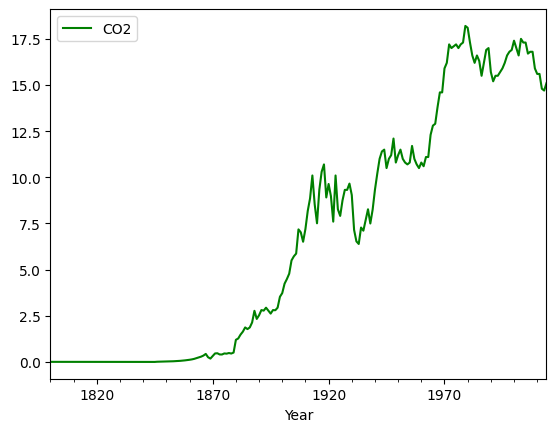

In [37]:
print("Graph with Original Values")
air_quality1.plot(color = 'green')
plt.show()

In [38]:
moving_avg_diff = air_quality1 - rolling_mean
moving_avg_diff.head(10)

,CO2
Year,
1800-01-01,NaN
1801-01-01,NaN
1802-01-01,NaN
1803-01-01,NaN
1804-01-01,NaN
1805-01-01,NaN
1806-01-01,NaN
1807-01-01,NaN
1808-01-01,NaN


# Eliminating trend and seasonality: Differencing

One of the most common method of dealing with both trend and seasonality is differencing. In this technique, we take the difference of the original observation at a particular instant with that at the previous instant. This mostly works well to improve stationarity. First order differencing can be done as follows:

# 1) First order differencing

In [39]:
df_first_difference = air_quality1 - air_quality1.shift(1)
adfuller_test(df_first_difference.dropna(inplace=False))

ADF test statistic:-3.7800045305842525
p value:0.003118649594242019
#Lags used:15
No. of observations used:198
Strong evidence against null hypothesis, data is stationary


The first difference improves the stationarity of the series significantly. Let us use also the seasonal first order difference to remove the seasonality of the data and see how that impacts stationarity of the data.

# 2) Seasonal First order differencing

In [40]:
df_seasonal_first_difference = df_first_difference - df_first_difference.shift(1)
adfuller_test(df_seasonal_first_difference.dropna(inplace=False))

ADF test statistic:-5.536081208815394
p value:1.7435262762124184e-06
#Lags used:14
No. of observations used:198
Strong evidence against null hypothesis, data is stationary


# 3) Eliminating trend and seasonality: Decomposing

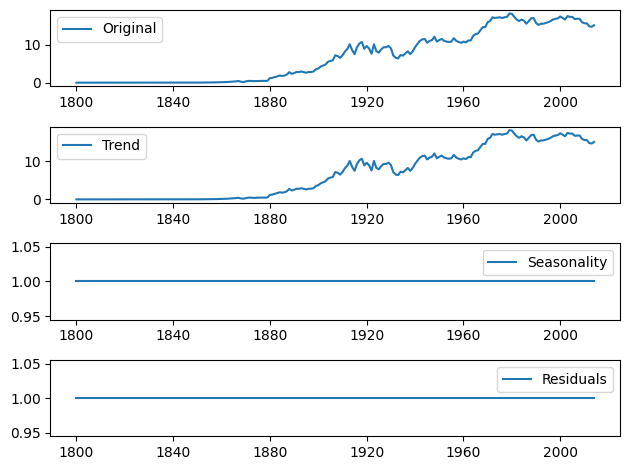

In [41]:
decomposition = seasonal_decompose(air_quality1,model="multiplicable")

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(air_quality1, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

# 1.5.1 Autocorrelation using ACF and PACF

In [42]:
import numpy as np
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from matplotlib import rcParams
from cycler import cycler

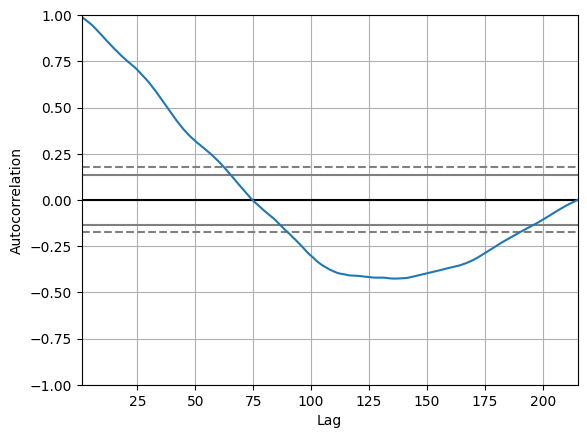

In [43]:
autocorrelation_plot(air_quality1)
plt.show()

# 1.5.3 ACF - Auto-Correlation Function

* used to qualitify the relationship between observation in time series at different time lags

In [44]:
# Calculate autocorrelation
acf_values = acf(air_quality1['CO2'])
acf_values

array([1.        , 0.99008921, 0.98068743, 0.97182645, 0.96152687,
       0.95118833, 0.93974547, 0.92691608, 0.91327908, 0.90014315,
       0.88671214, 0.87267889, 0.85863165, 0.84584347, 0.83274697,
       0.81898888, 0.80728389, 0.7945055 , 0.78177366, 0.77041222,
       0.75908921, 0.7481617 , 0.73746724, 0.72707027])

In [45]:
# ACF values
np.round(acf_values,2)

array([1.  , 0.99, 0.98, 0.97, 0.96, 0.95, 0.94, 0.93, 0.91, 0.9 , 0.89,
       0.87, 0.86, 0.85, 0.83, 0.82, 0.81, 0.79, 0.78, 0.77, 0.76, 0.75,
       0.74, 0.73])

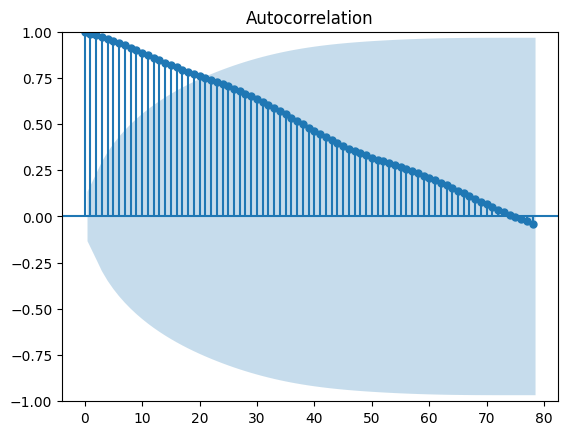

In [46]:
# Plot autocorrelation
plot_acf(air_quality1['CO2'], lags=78);

We can see here ACF shows strong positive statistical significance correlation at upto 72 lags that doesn't decay to zero this suggests that the series is non-stationary and after 73 there is a negative correlation we found.

# 1.5.4 PACF - Partial Autocorrelation Function

* Same as ACf the only different is that here we can control the intermediate lags.

In [47]:
# Calculate partial autocorrelation
pacf_values = pacf(air_quality1['CO2'])
pacf_values

array([ 1.00000000e+00,  9.94715798e-01,  4.13869717e-02,  4.73071451e-02,
       -1.41324184e-01, -2.20860663e-02, -1.33308573e-01, -1.43983733e-01,
       -1.22928872e-01,  4.17078363e-02, -8.62618451e-03, -2.61824544e-02,
        1.92300541e-03,  1.68256435e-01,  6.03875795e-03, -6.60993383e-02,
        1.76241064e-01, -9.48422474e-02, -1.66730943e-02,  3.87609869e-02,
        2.32605916e-02,  2.90935562e-02, -3.08345328e-02, -3.58827841e-04])

In [48]:
# PACF values
np.round(pacf_values,2)

array([ 1.  ,  0.99,  0.04,  0.05, -0.14, -0.02, -0.13, -0.14, -0.12,
        0.04, -0.01, -0.03,  0.  ,  0.17,  0.01, -0.07,  0.18, -0.09,
       -0.02,  0.04,  0.02,  0.03, -0.03, -0.  ])

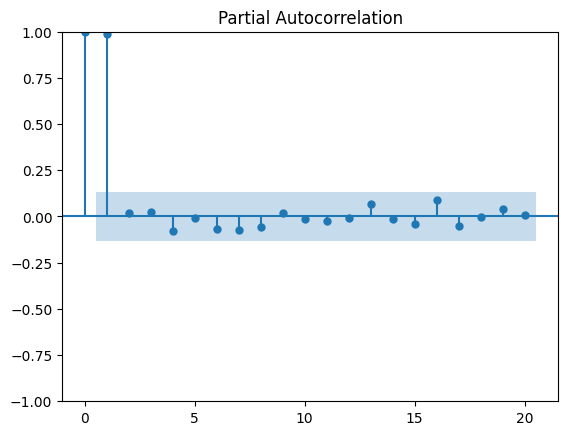

In [49]:
# Plot partial autocorrelation
plot_pacf(air_quality['CO2'], lags=20);

We can see 3-4 lags are exceeding the positive as well as negative threshold area while remaining lags are bounce around between being positive and negative inside the threshold

In [50]:
air_quality1.agg(['skew', 'kurtosis']).transpose()

,skew,kurtosis
CO2,0.362736,-1.417272


Inference:-

1) The positive value of Skewness indicated that data is skewed toward right.the positive skewness suggests that there may be a longer or fatter tail on the right side of the distribution of the 'CO2' data.
            
2) Kurtosis measures the peakedness or flatness of the distribution of the  data.A negative kurtosis value meaning it is flatter and has fewer extreme values (outliers) compared to a normal distribution.

# 1.6 Transformations

In [51]:
import pylab
import scipy.stats as stat

# 1.6.1 Normal/Gaussian Transformation

In [52]:
def plot_data(air_quality1,feature):
    plt.figure(figsize=(8,4))
    plt.subplot(1,2,1)
    air_quality1[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(air_quality1[feature],dist='norm',plot=pylab)
    plt.show()


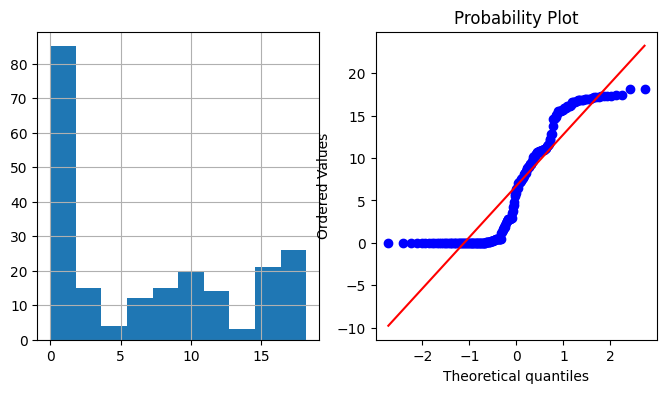

In [53]:
plot_data(air_quality,'CO2')

In [54]:
anorm = air_quality['CO2'].mean()

In [55]:
anorm

6.741970186046511

# 1.6.2 Square Root Transformation

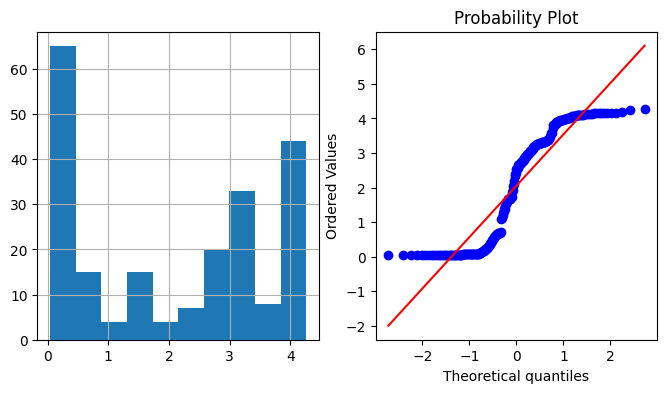

In [56]:
air_quality1['CO2_square']=air_quality1.CO2**(1/2)
plot_data(air_quality1,'CO2_square')

In [57]:
asquare = air_quality1['CO2_square'].mean()
asquare

2.05519410337343

# 1.6.3 Log Transformation

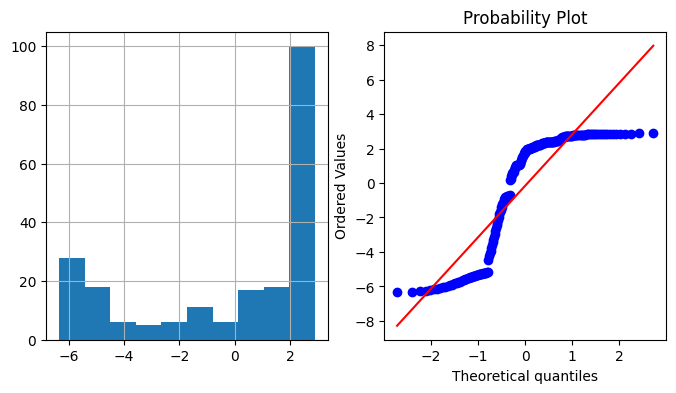

In [58]:
air_quality1['CO2_log']=np.log(air_quality1['CO2'])
plot_data(air_quality1,'CO2_log')

In [59]:
alog = air_quality1['CO2_log'].mean()
alog

-0.15584159533114728

# 1.6.4 Exponential Transformation

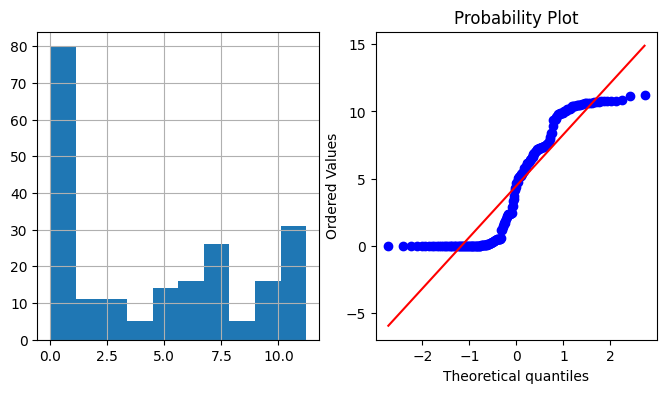

In [60]:
air_quality1['CO2_exponential']=air_quality1.CO2**(1/1.2)
plot_data(air_quality1,'CO2_exponential')

In [61]:
aexp = air_quality1['CO2_exponential'].mean()
aexp

4.4785133962157655

# 1.6.5 Box Cox Transformation

In [62]:
air_quality1['CO2_boxcox'],parameters=stat.boxcox(air_quality1['CO2'])

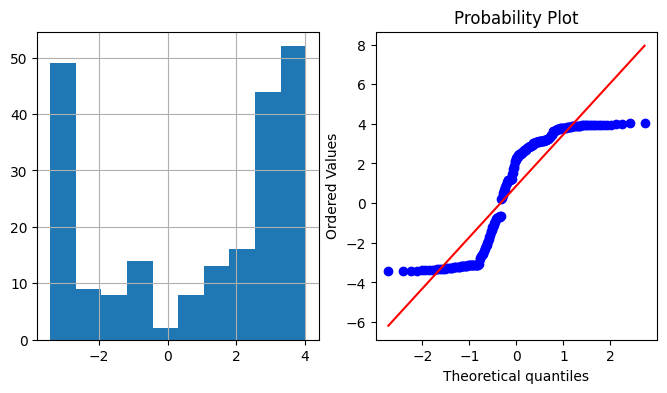

In [63]:
plot_data(air_quality1,'CO2_boxcox')

In [64]:
abox = air_quality1['CO2_boxcox'].mean()

In [65]:
data = {"Transformation":pd.Series(["Normal/Gaussian","Square Root","Logarithmic","Exponential","Box-Cox"]),"Average Transformed Value of CO2":pd.Series([anorm,asquare,alog,aexp,abox])}
table_transform=pd.DataFrame(data)
table_transform

,Transformation,Average Transformed Value of CO2
0,Normal/Gaussian,6.741970
1,Square Root,2.055194
2,Logarithmic,-0.155842
3,Exponential,4.478513
4,Box-Cox,0.876720


#Model building

Model Driven

Autoarima

In [66]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 10.4 MB/s eta 0:00:00


In [67]:
from pmdarima.arima import auto_arima
from pmdarima.arima import ADFTest

Data Splitting

In [68]:
train=df.head(172)
test=df.tail(43)

In [69]:
train

,CO2
Year,
1800-01-01,0.00568
1801-01-01,0.00561
1802-01-01,0.00555
1803-01-01,0.00548
1804-01-01,0.00542
...,...
1967-01-01,13.80000
1968-01-01,14.60000
1969-01-01,14.60000


Autoarima

In [70]:
arima_model= auto_arima(train,
                       trace=True, allowmean=False, allowdrift = False,
                       start_p=0,d=0,start_q=0,max_p=8,max_d=3,max_q=8,start_P=0,D=0,start_Q=0,max_P=8,
                       max_D=3,max_Q=8,random_state=8,error_action='ignore',
                        suppress_warnings=True,stepwise=True)



Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1030.887, Time=0.10 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=818.655, Time=0.30 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1130.582, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=302.975, Time=0.66 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=304.004, Time=0.94 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=304.189, Time=0.78 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=684.167, Time=0.66 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=inf, Time=0.97 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=303.270, Time=0.62 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=301.791, Time=0.14 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=911.448, Time=0.11 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.10 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=302.846, Time=0.21 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=302.992, Time=0

In [71]:
def forecast_accuracy(forecast, actual):
    rmse = sqrt(mean_squared_error(actual, forecast))
    return({ 'RMSE':rmse})

Plotting ARIMA model


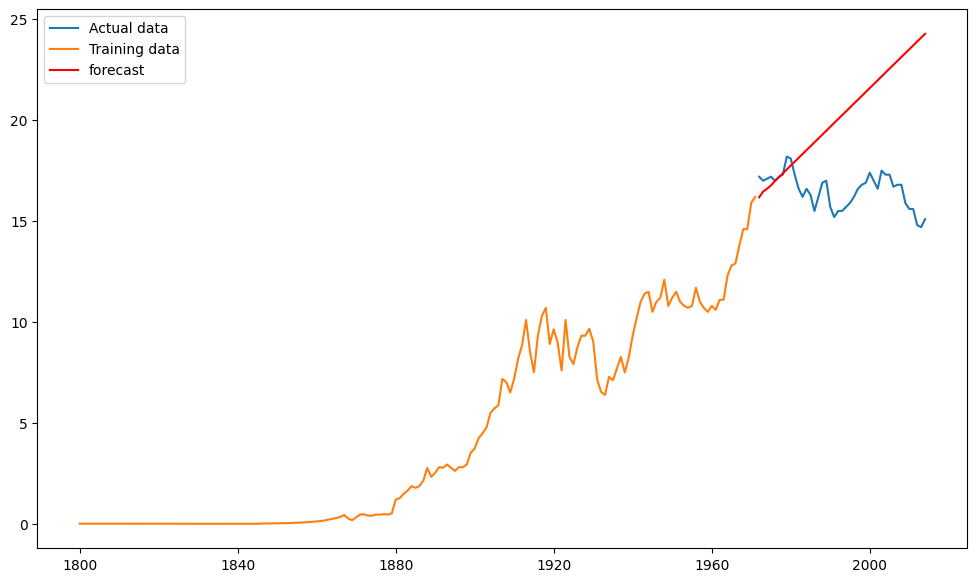

In [72]:
 # Autoarima
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train, order=(4,2,1))
results_ARIMA = model.fit()
model_pred= results_ARIMA.predict(test.index[0],test.index[-1])

plt.figure(figsize=(12,7))
plt.plot(test,label='Actual data')
plt.plot(train,label='Training data')
plt.plot(model_pred, color='red',label='forecast')
plt.legend()
print('Plotting ARIMA model')
plt.show()

In [73]:

# error on the test data
model_acc= forecast_accuracy(model_pred.values,test.values)
model_acc

{'RMSE': 4.710379535006901}

Text(0.5, 1.0, 'Residue Plot')

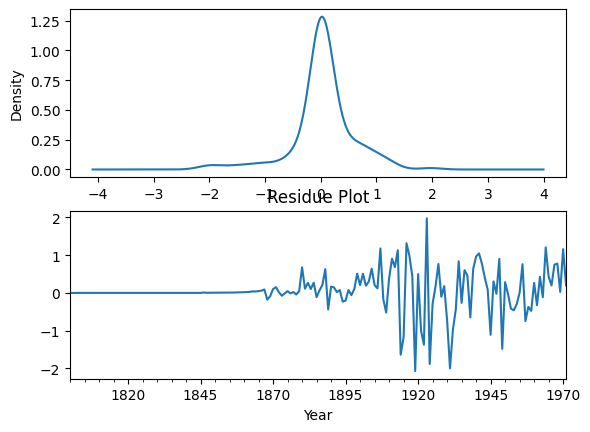

In [74]:
# Residue plot

plt.subplot(211)
results_ARIMA.resid.plot(kind='kde')
plt.subplot(212)
results_ARIMA.resid.plot()
plt.title('Residue Plot')


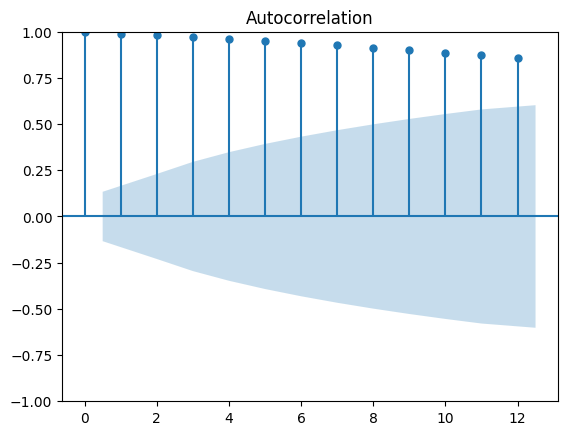

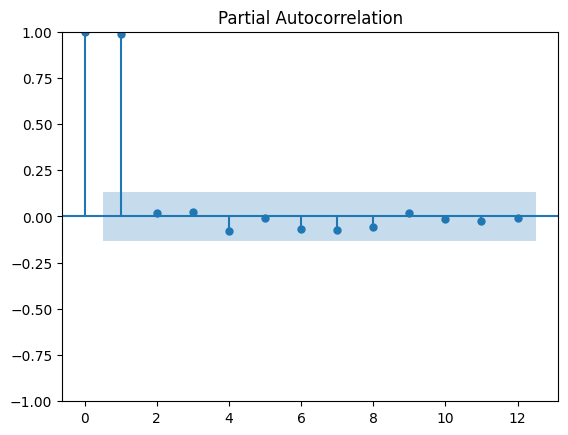

In [75]:
#acf and pacf plot
tsa_plots.plot_acf(df,lags=12)
tsa_plots.plot_pacf(df,lags=12)
plt.show()

In [76]:

# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(train, test, p_values, d_values, q_values):
    #dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(train, test, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [77]:

# evaluate parameters
p_values = range(0,5)
d_values = range(0,5)
q_values = range(0, 5)

evaluate_models(train.values, test.values,p_values, d_values, q_values)

Best ARIMANone RMSE=inf


Finding pdq value using for loop

In [78]:
import itertools
p = range(0,8)
q = range(0,8)
d = range(0,3)

In [79]:
pdq_combination = list(itertools.product(p,d,q))

In [80]:
len(pdq_combination)

192

In [81]:
rmse = []
order = []

In [82]:
for pdq in pdq_combination:
    try:
        model = ARIMA(train, order=pdq).fit()
        pred = model.predict(start=len(train),end=(len(df1)-1))
        error = np.sqrt(mean_squared_error(test,pred))
        order.append(pdq)
        rmse.append(error)
    except:
        continue

ARIMA Model on stationary data.

Plotting ARIMA model1


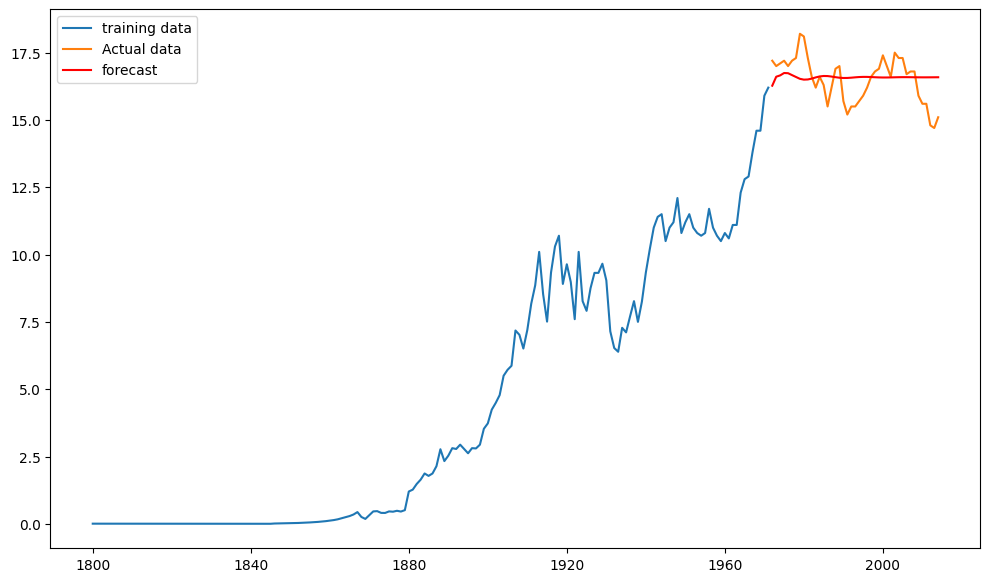

In [83]:
model1 = ARIMA(train, order=(5,1,3))
results_ARIMA1 = model1.fit()
model1_pred= results_ARIMA1.predict(test.index[0],test.index[-1])
plt.figure(figsize=(12,7))
plt.plot(train,label='training data')
plt.plot(test,label='Actual data')
plt.plot(model1_pred, color='red',label='forecast')
print('Plotting ARIMA model1')
plt.legend()
plt.show()

In [84]:
model1_acc= forecast_accuracy(model1_pred.values,test.values)
model1_acc

{'RMSE': 0.8478257755536087}

Plotting ARIMA model2


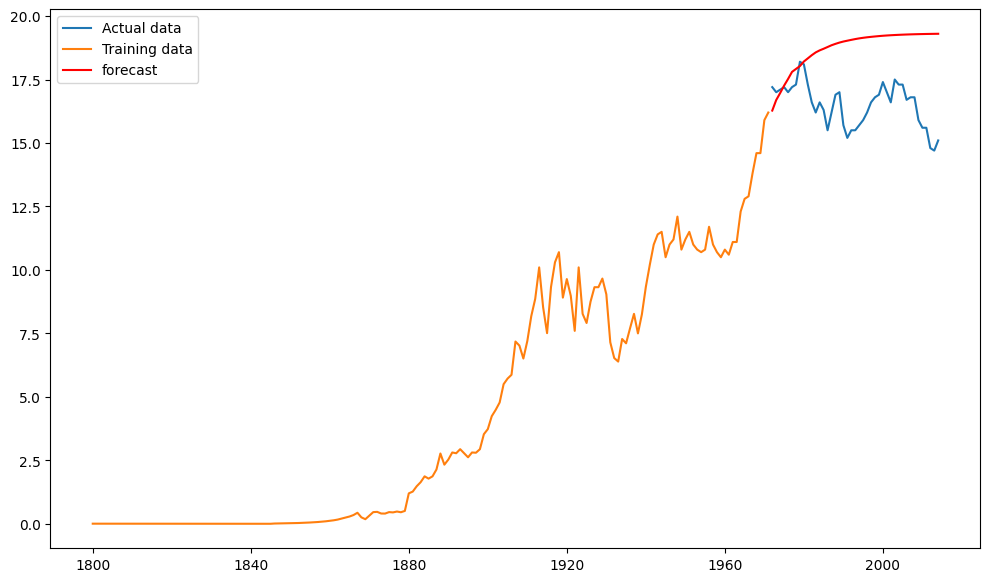

In [85]:

#AR model

plt.figure(figsize=(12,7))
model2 = ARIMA(train, order=(7,1,0))
results_ARIMA2 = model2.fit()
model2_pred= results_ARIMA2.predict(test.index[0],test.index[-1])
plt.plot(test,label='Actual data')
plt.plot(train,label='Training data')
plt.plot(model2_pred, color='red',label='forecast')
print('Plotting ARIMA model2')
plt.legend()
plt.show()

In [86]:
model2_acc= forecast_accuracy(model2_pred.values,test.values)
model2_acc

{'RMSE': 2.598480227899051}

Plotting ARIMA model3


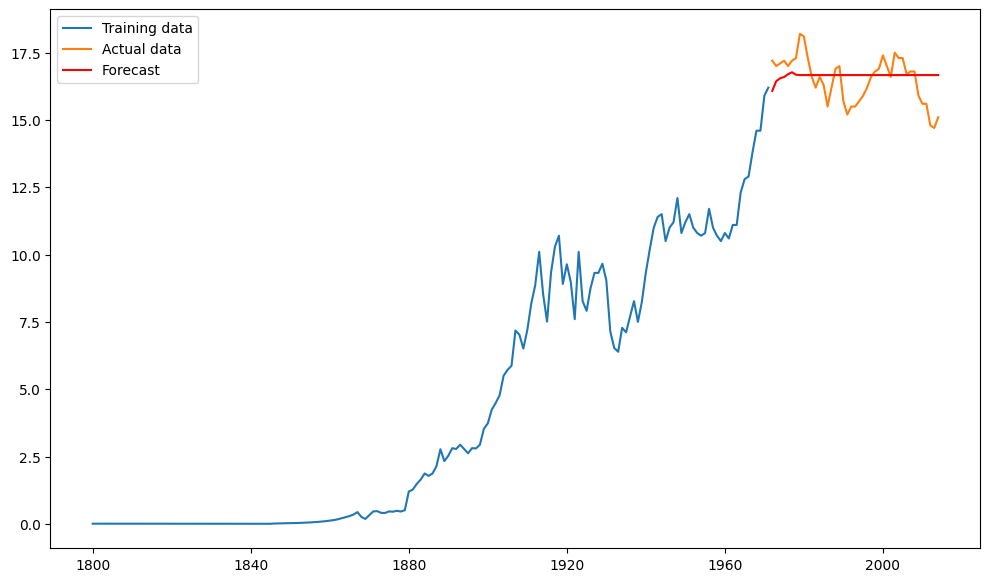

In [87]:
# MA model

plt.figure(figsize=(12,7))
model3 = ARIMA(train, order=(0,1,8))
results_ARIMA3 = model3.fit()
model3_pred= results_ARIMA3.predict(test.index[0],test.index[-1])

plt.plot(train,label='Training data')
plt.plot(test,label='Actual data')
plt.plot(model3_pred, color='red',label='Forecast')
plt.legend()
print('Plotting ARIMA model3')

In [88]:
model3_acc= forecast_accuracy(model3_pred.values,test.values)
model3_acc

{'RMSE': 0.8665772591173359}


Arima model on original data

In [89]:
#splitting the data
train1=df.head(172)
test1=df.tail(43)

In [90]:
train1.shape, test1.shape

((172, 1), (43, 1))

In [91]:
rmse1 = []
order1 = []

In [92]:

for pdq in pdq_combination:
    try:
        model1 = ARIMA(train, order=pdq).fit()
        pred1 = model1.predict(start=len(train1),end=(len(df)-1))
        error1 = np.sqrt(mean_squared_error(test1,pred1))
        order1.append(pdq)
        rmse1.append(error1)
    except:
        continue

In [93]:
value_pqd = pd.DataFrame(index=order1,data=rmse1,columns=['rmse1'])
value_pqd.sort_values('rmse1')

,rmse1
"(7, 0, 0)",0.793067
"(5, 0, 6)",0.806554
"(6, 0, 6)",0.812879
"(7, 0, 6)",0.814339
"(4, 0, 6)",0.827832
...,...
"(3, 2, 0)",14.573280
"(6, 2, 0)",14.610128
"(5, 2, 0)",14.973712
"(4, 2, 0)",15.254737


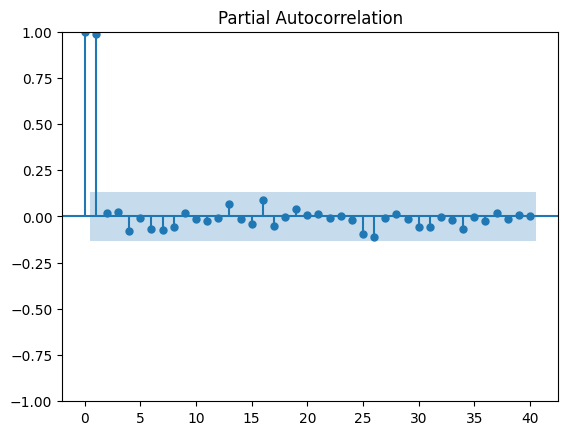

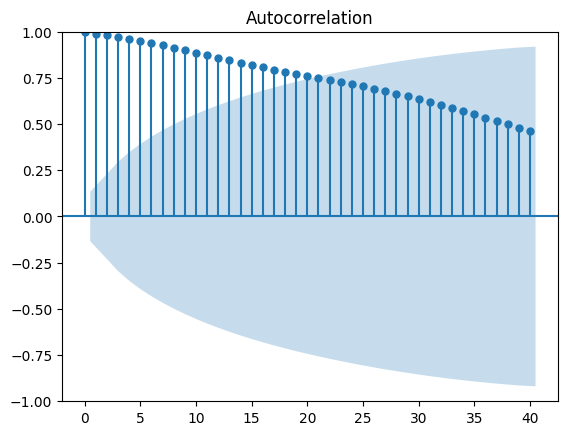

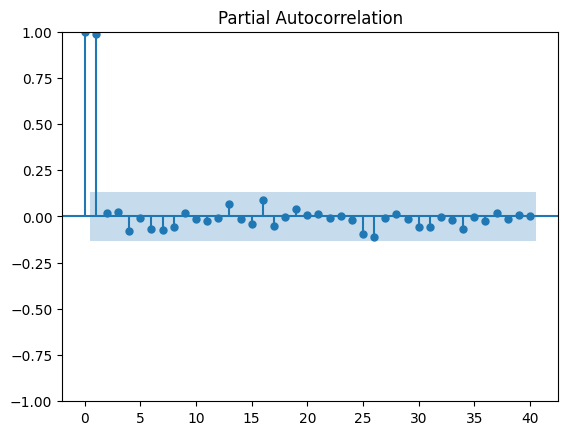

In [94]:

# acf and pacf plot for original data

tsa_plots.plot_acf(df,lags=40)
tsa_plots.plot_pacf(df,lags=40)

Plotting ARIMA model4


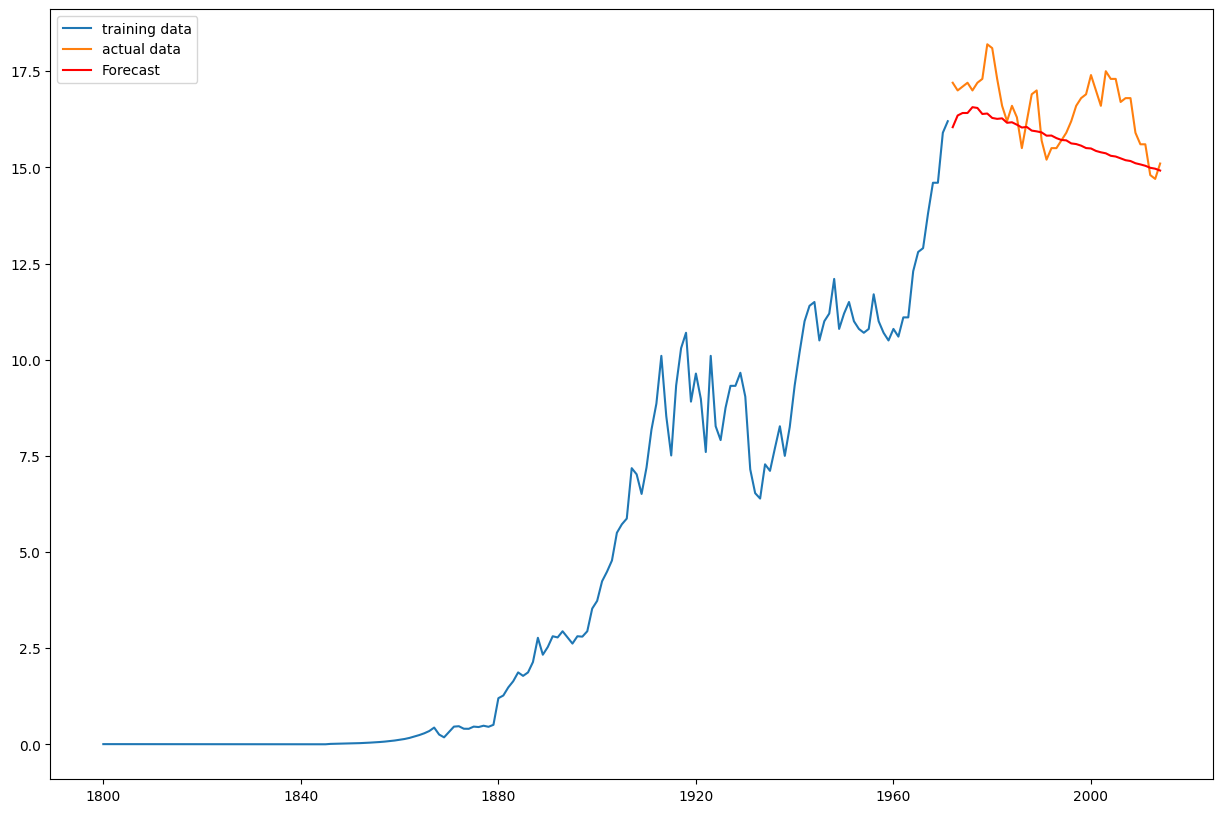

In [95]:
model4 = ARIMA(train1, order=(5,0,7))
results_ARIMA4 = model4.fit()
model4_pred= results_ARIMA4.predict(test1.index[0],test1.index[-1])
plt.figure(figsize=(15,10))
plt.plot(train1,label='training data')
plt.plot(test1,label='actual data')
plt.plot(model4_pred, color='red',label='Forecast')
print('Plotting ARIMA model4')
plt.legend(loc='upper left', fontsize=10)
plt.show()

In [96]:
model4_acc= forecast_accuracy(model4_pred.values,test1.values)
model4_acc

{'RMSE': 1.0675520911502503}

Data Driven

Holt Method/Double Exponential smoothing

In [97]:
# Holt method

hw_model = Holt(train1['CO2']).fit(smoothing_level=0.9, smoothing_slope=0.1)
pred_hw = hw_model.predict(start = test1.index[0],end = test1.index[-1])
forecast_accuracy(pred_hw,test1)

{'RMSE': 9.444025985067771}

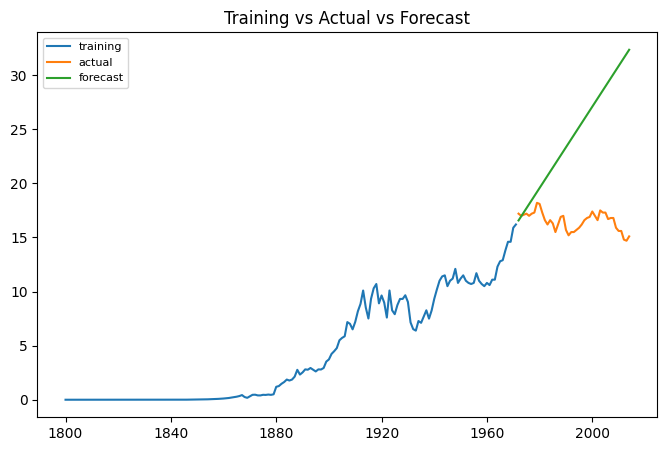

In [98]:
plt.figure(figsize=(8,5), dpi=100)
plt.plot(train1, label='training')
plt.plot(test1, label='actual')
plt.plot(pred_hw, label='forecast')
plt.title('Training vs Actual vs Forecast')
plt.legend(loc='upper left', fontsize=8)
plt.show()


Holt Winter Method/ Triple exponential

In [99]:
hwe_model_add = ExponentialSmoothing(train1,trend="add").fit()
pred_hwe_add = hwe_model_add.predict(start = test1.index[0],end = test1.index[-1])
forecast_accuracy(pred_hwe_add,test1)

{'RMSE': 2.451345247367883}

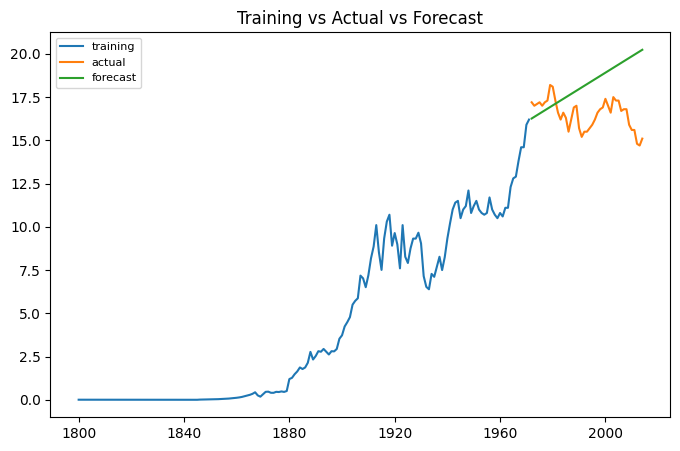

In [100]:
plt.figure(figsize=(8,5), dpi=100)
plt.plot(train1, label='training')
plt.plot(test1, label='actual')
plt.plot(pred_hwe_add, label='forecast')
plt.title('Training vs Actual vs Forecast')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [101]:

hwe_model_mul = ExponentialSmoothing(train1,trend="mul").fit()
pred_hwe_mul = hwe_model_mul.predict(start = test1.index[0],end = test1.index[-1])
forecast_accuracy(pred_hwe_mul,test1)

{'RMSE': 8.55861296786072}

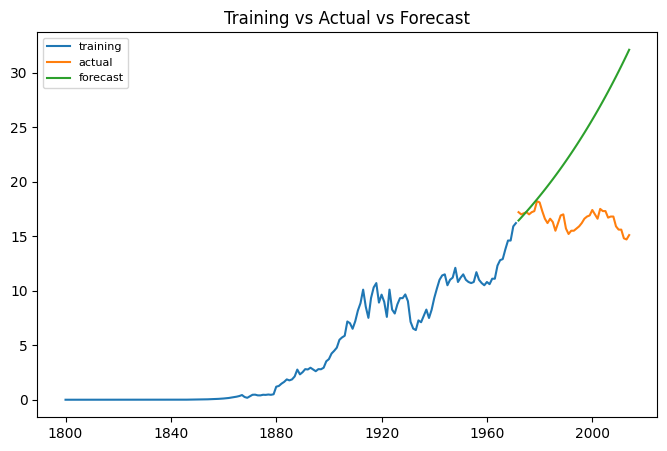

In [102]:
plt.figure(figsize=(8,5), dpi=100)
plt.plot(train1, label='training')
plt.plot(test1, label='actual')
plt.plot(pred_hwe_mul, label='forecast')
plt.title('Training vs Actual vs Forecast')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [103]:
DF =[['Autoarima',0.4650,0.1059],['ARIMA_sd',0.4126,0.0939],['AR Model(7,1,0)',0.4627,0.1053],['MA Model(0,1,8)',0.4609,0.1049],['ARIMA_ns',1.4733,0.0809],['Holt Method model',1.7457,0.0959],['hwe_model_add',1.7793,0.0977],['hwe_model_mul',2.2645,0.1244]]
MODELS= pd.DataFrame(DF,columns=['Model','RMSE','Normalised RMSE'])

In [104]:
MODELS

,Model,RMSE,Normalised RMSE
0,Autoarima,0.4650,0.1059
1,ARIMA_sd,0.4126,0.0939
2,"AR Model(7,1,0)",0.4627,0.1053
3,"MA Model(0,1,8)",0.4609,0.1049
4,ARIMA_ns,1.4733,0.0809
5,Holt Method model,1.7457,0.0959
6,hwe_model_add,1.7793,0.0977
7,hwe_model_mul,2.2645,0.1244


In [105]:
MODELS.sort_values(by=['Normalised RMSE'],inplace=True)

In [106]:
MODELS

,Model,RMSE,Normalised RMSE
4,ARIMA_ns,1.4733,0.0809
1,ARIMA_sd,0.4126,0.0939
5,Holt Method model,1.7457,0.0959
6,hwe_model_add,1.7793,0.0977
3,"MA Model(0,1,8)",0.4609,0.1049
2,"AR Model(7,1,0)",0.4627,0.1053
0,Autoarima,0.4650,0.1059
7,hwe_model_mul,2.2645,0.1244


In [107]:
# For Non-stationary data
MaxminusMin = 18.200000-0.001750

In [108]:
normalised_RMSE = MODELS.RMSE[7]/ MaxminusMin

In [109]:
normalised_RMSE

0.1244350418309453

In [110]:
# For stationary data
MaxminusMin_stationarydata = 2.500 + 1.890

In [111]:
normalised_RMSE1 = MODELS.RMSE[0]/ MaxminusMin_stationarydata

In [112]:
normalised_RMSE1

0.1059225512528474


Final Model


Finally we are going to choose ARIMA(5,0,7) as a final model.

In [113]:
final_model = ARIMA(df, order=(5,0,7))
final_arima = final_model.fit()

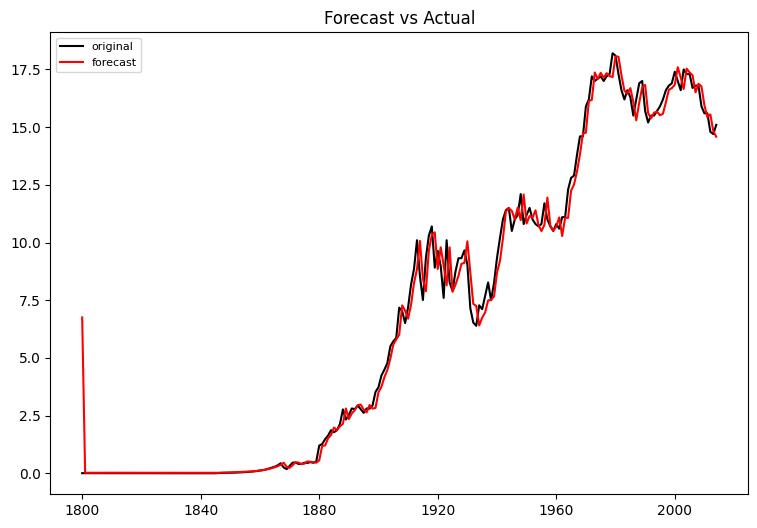

In [114]:

plt.figure(figsize=(9,6),dpi=100 )
plt.plot(df, label='original',color='black')
plt.plot(final_arima.fittedvalues, label='forecast',color='red')
plt.title('Forecast vs Actual')
plt.legend(loc='upper left', fontsize=8)
plt.show()


Forecast for next 20 years

In [115]:
forecast=final_arima.forecast(20)

In [116]:
future_dates =[df.index[-1]+ DateOffset(years=x)for x in range(0,21)]
future_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)
future_df.tail()
len(future_df)

20

In [117]:

future_df

,CO2
2015-01-01,NaN
2016-01-01,NaN
2017-01-01,NaN
2018-01-01,NaN
2019-01-01,NaN
2020-01-01,NaN
2021-01-01,NaN
2022-01-01,NaN
2023-01-01,NaN
2024-01-01,NaN


In [118]:
len(future_df)

20

In [119]:

future_df['CO2'] = final_arima.predict(start = 215, end = 235, dynamic= True)

In [120]:

future_df

,CO2
2015-01-01,14.792868
2016-01-01,14.690106
2017-01-01,14.661562
2018-01-01,14.497441
2019-01-01,14.407986
2020-01-01,14.557699
2021-01-01,14.604778
2022-01-01,14.390190
2023-01-01,14.405869
2024-01-01,14.529880


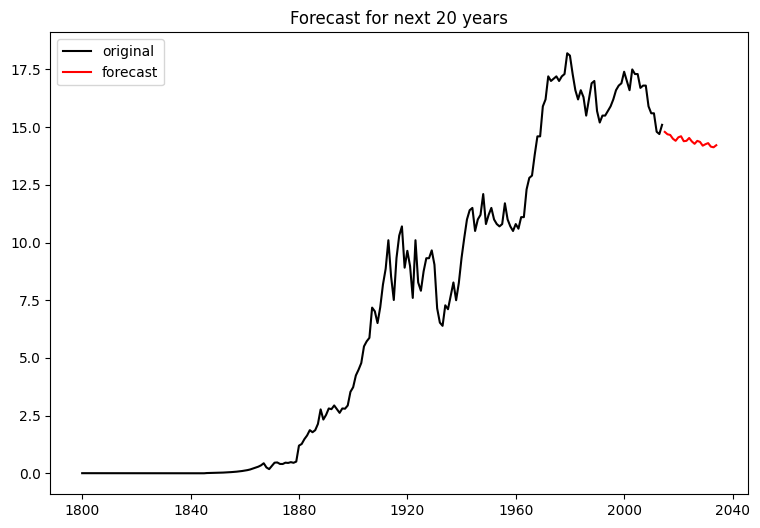

In [121]:
plt.figure(figsize=(9,6), dpi=100)
plt.plot(df, label='original',color='black')
plt.plot(future_df['CO2'], label='forecast',color='red')
plt.title('Forecast for next 20 years')
plt.legend()
plt.show()